In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df_churn = pd.read_csv('Churn.csv')

In [3]:
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Data Preprocessing

In [9]:
# Remove unnecessary columns (RowNumber & CustomerID)
clean_df = df_churn.drop(['RowNumber', 'CustomerId'], axis = 1)
clean_df.head(5)

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
# Encode gender columns with label encoder 
clean_df['Gender'] = LabelEncoder().fit_transform(clean_df['Gender'])
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [18]:
clean_df['Gender'].unique()

array([0, 1], dtype=int64)

In [22]:
# Encode geography columns with label encoder
clean_df['Geography'] = LabelEncoder().fit_transform(clean_df['Geography'])

In [24]:
clean_df['Geography'].unique()

array([0, 2, 1], dtype=int64)

In [25]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null int32
Gender             10000 non-null int64
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int32(1), int64(8), object(1)
memory usage: 898.6+ KB


### Exploratory Data Analysis

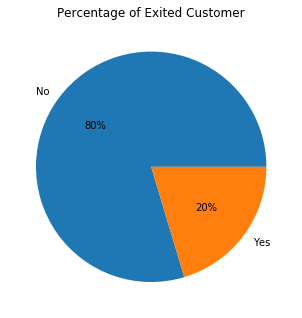

In [109]:
# Visualize percentage of exited or not customer

churn_count = df_churn['Exited'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

labels = ['No', 'Yes']

ax.pie(churn_count, labels=labels, autopct='%.0f%%')
plt.title('Percentage of Exited Customer')
plt.show()

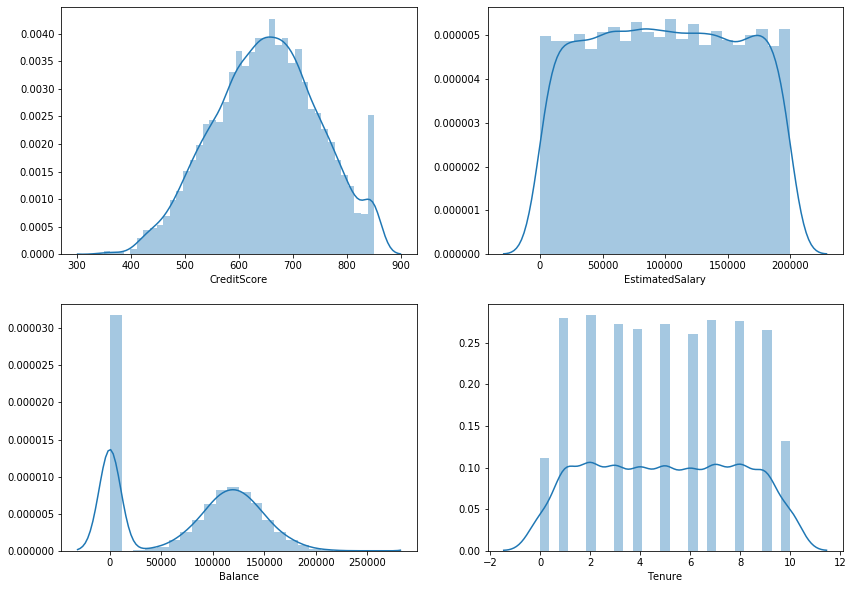

In [110]:
# Distribution of data for numerical features

numerical_features = ['CreditScore','Tenure','Balance', 'EstimatedSalary']

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

sns.distplot(df_churn['CreditScore'], ax = ax[0][0])
sns.distplot(df_churn['EstimatedSalary'], ax = ax[0][1])
sns.distplot(df_churn['Balance'], ax = ax[1][0])
sns.distplot(df_churn['Tenure'], ax = ax[1][1])

plt.show()

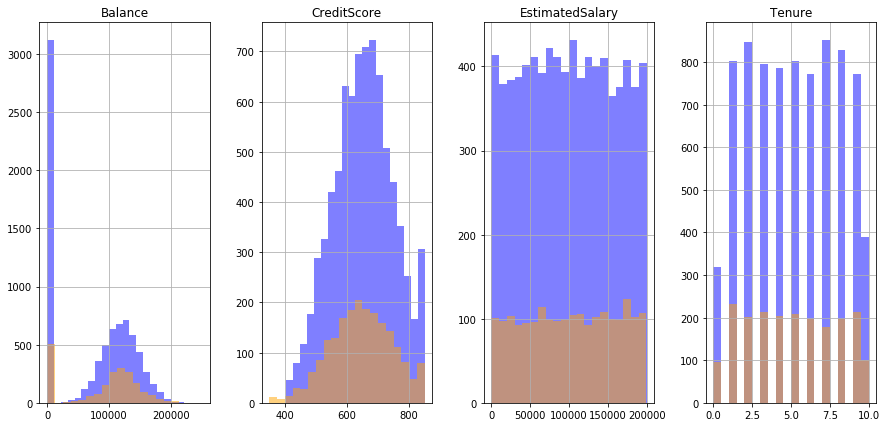

In [113]:
# Numerical Features visualization

fig, ax = plt.subplots(1, 4, figsize=(15, 7))

df_churn[df_churn['Exited'] == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_churn[df_churn['Exited'] == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

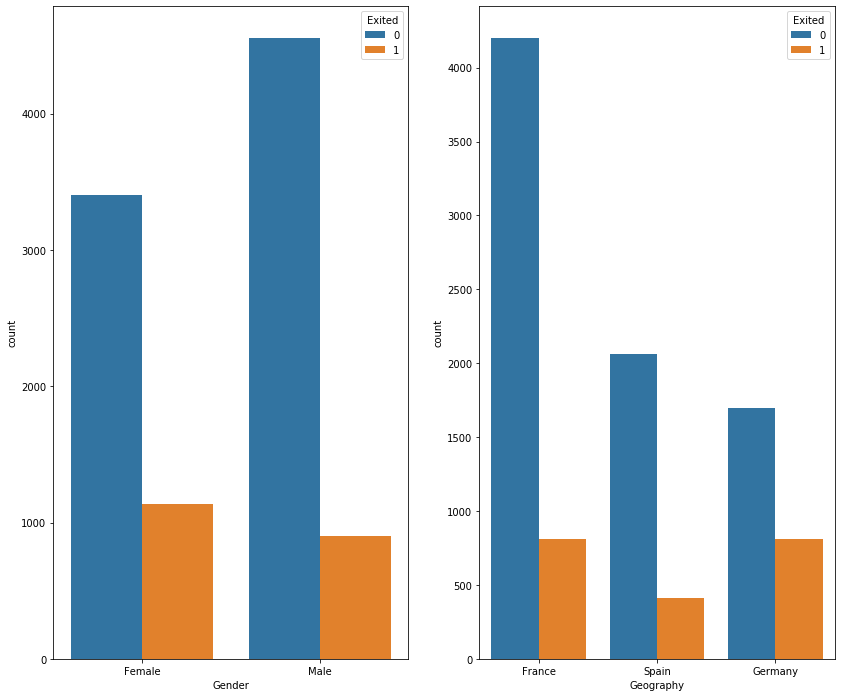

In [91]:
# Categorical Features visualization

fig, ax = plt.subplots(1, 2, figsize=(14, 12))

sns.countplot(data=df_churn, x='Gender', hue='Exited', ax=ax[0])
sns.countplot(data=df_churn, x='Geography', hue='Exited', ax=ax[1])

plt.show()

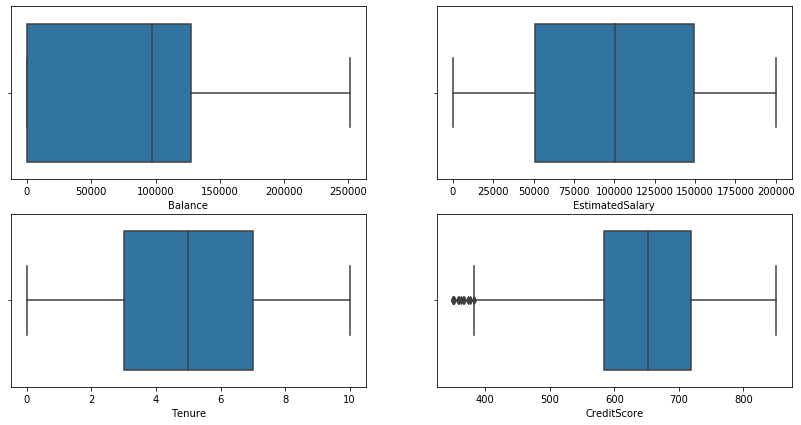

In [123]:
fig, ax = plt.subplots(2, 2, figsize=(14, 7))

sns.boxplot(data=df_churn, x='Balance', ax=ax[0][0])
sns.boxplot(data=df_churn, x='EstimatedSalary', ax=ax[0][1])
sns.boxplot(data=df_churn, x='Tenure', ax=ax[1][0])
sns.boxplot(data=df_churn, x='CreditScore', ax=ax[1][1])

plt.show()

In [125]:
clean_df.to_csv('Clean_df', index = False)